In [18]:
import pandas as pd

data=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.08.31/left_right_data.xlsx")

data


,FORCE_L,X_COR_L,Y_COR_L,COPX,COPY,FSR_L,FSRNONOISE_L,FSR_mass_L,FORCE_R,X_COR_R,Y_COR_R,COPX.1,COPY.1,FSR_R,FSRNONOISE_R,FSR_mass_R
0,0,NaN,NaN,5.575461,26.583173,24,0,0.0,0,NaN,NaN,5.575461,26.583173,26,0,0.0
1,0,NaN,NaN,5.578947,26.571607,24,0,0.0,0,NaN,NaN,5.578947,26.571607,27,0,0.0
2,0,NaN,NaN,5.584776,26.568425,26,0,0.0,0,NaN,NaN,5.584776,26.568425,24,0,0.0
3,0,NaN,NaN,5.575269,26.562586,28,0,0.0,0,NaN,NaN,5.575269,26.562586,22,0,0.0
4,0,NaN,NaN,5.583772,26.569648,26,0,0.0,0,NaN,NaN,5.583772,26.569648,24,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,0,NaN,NaN,5.935185,26.638889,29,0,0.0,0,NaN,NaN,5.935185,26.638889,29,0,0.0
863,0,NaN,NaN,5.940000,26.580000,27,0,0.0,0,NaN,NaN,5.940000,26.580000,30,0,0.0
864,0,NaN,NaN,6.000000,26.558140,25,0,0.0,0,NaN,NaN,6.000000,26.558140,31,0,0.0
865,0,NaN,NaN,5.607143,26.428571,25,0,0.0,0,NaN,NaN,5.607143,26.428571,33,0,0.0


In [19]:
data.isnull().sum()

FORCE_L           0
X_COR_L         388
Y_COR_L         629
COPX              0
COPY              0
FSR_L             0
FSRNONOISE_L      0
FSR_mass_L        1
FORCE_R           0
X_COR_R         358
Y_COR_R         358
COPX.1            0
COPY.1            0
FSR_R             0
FSRNONOISE_R      0
FSR_mass_R        0
dtype: int64

In [20]:
columns=data.columns
columns

Index(['FORCE_L', 'X_COR_L', 'Y_COR_L', 'COPX', 'COPY', 'FSR_L',
       'FSRNONOISE_L', 'FSR_mass_L', 'FORCE_R', 'X_COR_R', 'Y_COR_R', 'COPX.1',
       'COPY.1', 'FSR_R', 'FSRNONOISE_R', 'FSR_mass_R'],
      dtype='object')

In [21]:
data=data.interpolate(method='linear')

In [22]:
data.isnull().sum()

FORCE_L           0
X_COR_L         118
Y_COR_L         145
COPX              0
COPY              0
FSR_L             0
FSRNONOISE_L      0
FSR_mass_L        0
FORCE_R           0
X_COR_R         138
Y_COR_R         138
COPX.1            0
COPY.1            0
FSR_R             0
FSRNONOISE_R      0
FSR_mass_R        0
dtype: int64

In [23]:
for i in columns:
    data[i].fillna(data[i].mean(),inplace=True)

In [24]:
data.isnull().sum()

FORCE_L         0
X_COR_L         0
Y_COR_L         0
COPX            0
COPY            0
FSR_L           0
FSRNONOISE_L    0
FSR_mass_L      0
FORCE_R         0
X_COR_R         0
Y_COR_R         0
COPX.1          0
COPY.1          0
FSR_R           0
FSRNONOISE_R    0
FSR_mass_R      0
dtype: int64

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [27]:
data.drop(labels=['X_COR_L','Y_COR_L','COPX','COPY','FSR_L','FSRNONOISE_L','FSR_mass_L','X_COR_R','Y_COR_R','COPX.1','COPY.1','FSR_R','FSRNONOISE_R','FSR_mass_R'],axis=1,inplace=True)
data

,FORCE_L,FORCE_R
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
862,0,0
863,0,0
864,0,0
865,0,0


Pandas computed Pearson r: 0.256165652344603
Scipy computed Pearson r: 0.2561656523446022 and p-value: 1.8585883398660955e-14


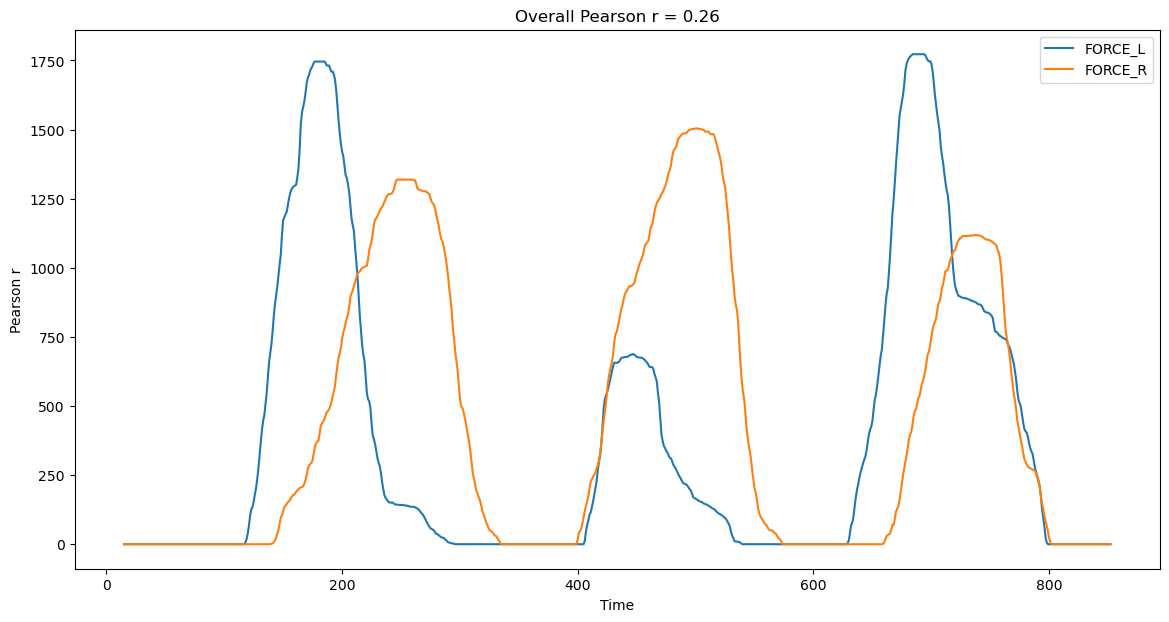

In [28]:
overall_pearson_r = data.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")


r, p = stats.pearsonr(data.dropna()['FORCE_L'],data.dropna()['FORCE_R'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")


# Compute rolling window synchrony
f,ax=plt.subplots(figsize=(14,7))
data.rolling(window=30,center=True).median().plot(ax=ax)
ax.set(xlabel='Time',ylabel='Pearson r')
ax.set(title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}");
